# Basit Doğrusal Regresyon

In [1]:
import pandas as pd
df = pd.read_csv("Advertising.csv")

In [2]:
df = df.iloc[:,1:len(df)]
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
import seaborn as sns

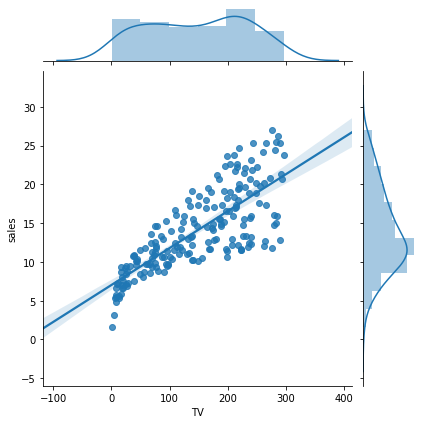

In [5]:
sns.jointplot(x="TV",y = "sales", data = df,kind = "reg");

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
X = df[["TV"]]

In [9]:
y = df[["sales"]]

In [10]:
reg = LinearRegression()

In [11]:
model = reg.fit(X,y)

In [12]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
str(model)

'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)'

In [14]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [15]:
model.intercept_ # Beta_0

array([7.03259355])

In [16]:
model.coef_ # Beta_1

array([[0.04753664]])

In [17]:
#rkare
model.score(X,y)

0.611875050850071

## Tahmin

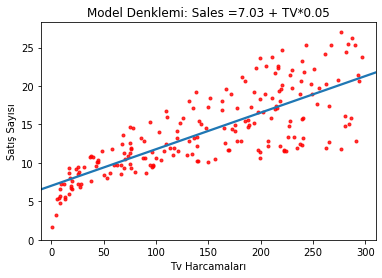

In [20]:
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"],df["sales"],ci = None,scatter_kws = {"color":"r","s":9})
g.set_title("Model Denklemi: Sales =7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("Tv Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

Sales = 7.03 + 0.05*TV

In [22]:
7.03 + 0.05*165

15.280000000000001

In [26]:
model.predict([[165]])

array([[14.87613922]])

In [33]:
yeni_veri = [[0],[150],[500]]
model.predict(yeni_veri)

array([[ 7.03259355],
       [14.16308961],
       [30.80091377]])

### Artıklar

#### MSE: Hata Karaler Ortalaması
#### RMSE: Hata Kareler Ortalamsının Karekökü

In [37]:
gercek_y = y[0:10]

In [46]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [47]:
hatalar = pd.concat([gercek_y,tahmin_edilen_y],axis=1)

In [48]:
hatalar.columns = ["gercek_y","tahmin_edilen_y"]

In [49]:
hatalar

gercek_y  tahmin_edilen_y
0      22.1        17.970775
1      10.4         9.147974
2       9.3         7.850224
3      18.5        14.234395
4      12.9        15.627218
5       7.2         7.446162
6      11.8         9.765950
7      13.2        12.746498
8       4.8         7.441409
9      10.6        16.530414

In [50]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [51]:
hatalar

gercek_y  tahmin_edilen_y      hata
0      22.1        17.970775  4.129225
1      10.4         9.147974  1.252026
2       9.3         7.850224  1.449776
3      18.5        14.234395  4.265605
4      12.9        15.627218 -2.727218
5       7.2         7.446162 -0.246162
6      11.8         9.765950  2.034050
7      13.2        12.746498  0.453502
8       4.8         7.441409 -2.641409
9      10.6        16.530414 -5.930414

In [56]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [57]:
hatalar

gercek_y  tahmin_edilen_y      hata  hata_karaler  hata_kareler
0      22.1        17.970775  4.129225     17.050503     17.050503
1      10.4         9.147974  1.252026      1.567569      1.567569
2       9.3         7.850224  1.449776      2.101851      2.101851
3      18.5        14.234395  4.265605     18.195390     18.195390
4      12.9        15.627218 -2.727218      7.437719      7.437719
5       7.2         7.446162 -0.246162      0.060596      0.060596
6      11.8         9.765950  2.034050      4.137358      4.137358
7      13.2        12.746498  0.453502      0.205664      0.205664
8       4.8         7.441409 -2.641409      6.977040      6.977040
9      10.6        16.530414 -5.930414     35.169814     35.169814

In [58]:
import numpy as np
np.mean(hatalar["hata_kareler"])

9.290350329638105

# Çoklu Doğrusal Regresyon

In [59]:
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [61]:
X = df.drop("sales",axis=1)
y = df[["sales"]]

In [62]:
y.head()

sales
0   22.1
1   10.4
2    9.3
3   18.5
4   12.9

In [63]:
X.head()

TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

In [65]:
# Statsmodel ile model kurmak

In [67]:
import statsmodels.api as sm

In [68]:
lm = sm.OLS(y,X)

In [69]:
model = lm.fit()

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Thu, 23 Apr 2020   Prob (F-statistic):                   2.43e-171
Time:                        16:51:25   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
## Sci-kit ile model kurmak

In [73]:
lm = LinearRegression()

In [75]:
model=lm.fit(X,y)

In [76]:
model.intercept_

array([2.93888937])

In [77]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

### Tahmin

** Sales = 2.94 + TV * 0.04 + radio*0.19-newspaper*0.001

In [78]:
2.94 + 30*0.04+10*0.19-40*0.001

5.999999999999999

In [85]:
yeni_veri = [[30],[10],[40]]

In [86]:
yeni_veri = pd.DataFrame(yeni_veri).T

In [87]:
yeni_veri

0   1   2
0  30  10  40

In [88]:
model.predict(yeni_veri)

array([[6.15562918]])

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [92]:
mse = mean_squared_error(y,model.predict(X))

In [93]:
rmse = np.sqrt(mse)

In [94]:
mse

2.784126314510936

In [95]:
rmse

1.6685701407225697

### Ç.D.R Model Tuning (Doğrulama)

In [96]:
X.head()

TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

In [97]:
y.head()

sales
0   22.1
1   10.4
2    9.3
3   18.5
4   12.9

In [98]:
# Test-train split
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=99)

In [100]:
X_train.head()

TV  radio  newspaper
16    67.8   36.6      114.0
51   100.4    9.6        3.6
97   184.9   21.0       22.0
164  117.2   14.7        5.4
71   109.8   14.3       31.7

In [101]:
y_train.head()

sales
16    12.5
51    10.7
97    15.5
164   11.9
71    12.4

In [102]:
X_test.head()

TV  radio  newspaper
135  48.3   47.0        8.5
127  80.2    0.0        9.2
191  75.5   10.8        6.0
66   31.5   24.6        2.2
119  19.4   16.0       22.3

In [103]:
y_test.head()

sales
135   11.6
127    8.8
191    9.9
66     9.5
119    6.6

In [104]:
lm = LinearRegression()

In [105]:
model=lm.fit(X_train,y_train)

In [107]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train))) # Eğitim hatası

1.7236824822650751

In [108]:
np.sqrt(mean_squared_error(y_test,model.predict(X_test))) # Test hatası

1.4312783138301641

In [109]:
# K-Fold CV

In [28]:
from sklearn.model_selection import cross_val_score

In [112]:
cross_val_score(model,X_train,y_train,cv=10,scoring = "neg_mean_squared_error")

array([-2.1019073 , -2.48953197, -3.09704214, -2.34694216, -3.68175761,
       -1.8691401 , -3.18173007, -4.1927349 , -2.17128376, -8.03821974])

In [113]:
np.mean(-cross_val_score(model,X_train,y_train,cv=10,scoring = "neg_mean_squared_error"))

3.317028974234127

In [114]:
#rmse
np.sqrt(np.mean(-cross_val_score(model,X_train,y_train,cv=10,scoring = "neg_mean_squared_error")))

1.821271252239525

# Ridge Regresyon

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [8]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
df.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  
5   336     194      A        W      282      421      25   750.0         A

In [11]:
df.shape

(263, 20)

In [12]:
ridge_model = Ridge(alpha = 0.1).fit(X_train,y_train)

In [13]:
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [14]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [15]:
ridge_model.intercept_

-4.578626905722217

In [16]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [17]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [19]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)

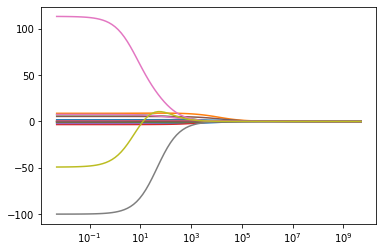

In [21]:
ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")

## Tahmin

In [22]:
ridge_model = Ridge().fit(X_train,y_train)
y_pred = ridge_model.predict(X_train)

In [24]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [25]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [26]:
RMSE = np.sqrt(mean_squared_error(y_train,y_pred)) # Train hatası
RMSE

289.34470696006565

In [29]:
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,y_train,cv=10,scoring = "neg_mean_squared_error")))

351.3931585606317

In [30]:
# Test hatası
y_pred = ridge_model.predict(X_test)

In [31]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

356.8082905730238

### Model Tuning

In [34]:
ridge_model = Ridge(alpha=1).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.8082905730238

In [35]:
np.random.randint(0,1000,100)

array([989, 714, 131, 361, 986, 743, 183, 900, 735, 653, 449, 754, 526,
       496, 260,  72, 700, 240, 783, 101, 190, 882, 566, 639, 196, 409,
       936, 564, 737,  93, 673, 697, 365, 414, 281, 371, 545, 832,  78,
       329, 376, 237, 619, 340, 761, 218, 246, 755, 386, 298, 964, 762,
       162, 250, 331, 983, 770, 791, 813, 117, 879,  67, 868, 444, 730,
       125, 998, 542, 244, 441, 212,  67, 439, 464,  92, 857,  75, 952,
       959, 728, 484,  94,  96, 884, 322, 206, 674, 203, 655, 824, 396,
       496, 662, 246, 834, 572, 187, 255, 929,  48])

In [36]:
lambdalar1 = np.random.randint(0,1000,100)
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [37]:
ridgecv = RidgeCV(alphas = lambdalar2,scoring = "neg_mean_squared_error",cv=10,normalize = True)

In [38]:
ridgecv.fit(X_train,y_train)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [40]:
ridgecv.alpha_

0.7599555414764666

In [41]:
#final modeli
ridge_tuned = Ridge(alpha = ridgecv.alpha_ ).fit(X_train,y_train)

In [42]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.8583047271521

In [43]:
ridgecv = RidgeCV(alphas = lambdalar1,scoring = "neg_mean_squared_error",cv=10,normalize = True)

In [44]:
ridgecv.fit(X_train,y_train)
ridgecv.alpha_

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


4

In [45]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_ ).fit(X_train,y_train)

In [46]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.4496377581236

## Lasso Regresyon

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [4]:
df.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  
5   336     194      A        W      282      421      25   750.0         A

In [5]:
df.shape

(263, 20)

In [6]:
lasso_model=Lasso().fit(X_train,y_train)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850385, tolerance: 3898.686956380658
  positive)


In [7]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
lasso_model.intercept_

-5.587450677336733

In [9]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [10]:
# Farklı lambda değerlerine karşılık kat sayılar

In [21]:
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
ridge_model = Ridge()
coefs = []

for i in alphas2:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    coefs.append(ridge_model.coef_)

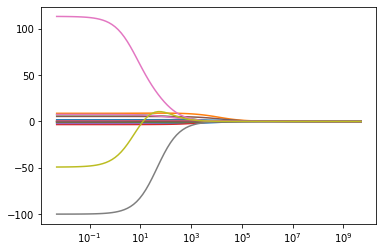

In [23]:
ax = plt.gca()
ax.plot(alphas2,coefs)
ax.set_xscale("log")

### Tahmin

In [25]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [28]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [30]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.0975884554033

In [32]:
r2_score(y_test,y_pred)

0.4142279813236619

### Model Tuning

In [34]:
lasso_cv_model = LassoCV(cv=10,max_iter=100000).fit(X_train,y_train)

In [35]:
lasso_cv_model.alpha_

563.4670501833854

In [36]:
lasso_tuned = Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [37]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

373.5957225069793

In [38]:
lasso_cv_model = LassoCV(alphas= alphas1,cv=10,max_iter=100000).fit(X_train,y_train)

In [39]:
lasso_cv_model.alpha_

174

In [40]:
lasso_tuned = Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [41]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

362.5921216788517

In [46]:
pd.Series(lasso_tuned.coef_,index=X_train.columns)

AtBat         -1.192625
Hits           5.699482
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.911783
Years          0.000000
CAtBat        -0.166805
CHits          0.211923
CHmRun        -0.000000
CRuns          1.085263
CRBI           0.475355
CWalks        -0.232876
PutOuts        0.273336
Assists        0.182574
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

## ElesticNet Regresyon

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [2]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [3]:
enet_model = ElasticNet().fit(X_train,y_train)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367279, tolerance: 3898.686956380658
  positive)


In [5]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [6]:
enet_model.intercept_

-6.465955602113127

In [7]:
#tahmin
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [8]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [9]:
y_pred = enet_model.predict(X_test)

In [10]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.1676548181244

In [12]:
r2_score(y_test,y_pred)

0.41070222469326945

### Model Tuning

In [14]:
enet_cv_model=ElasticNetCV(cv=10).fit(X_train,y_train)

In [15]:
enet_cv_model.alpha_

5230.7647364798695

In [16]:
enet_cv_model.coef_

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [17]:
enet_cv_model.intercept_

-38.5194055839429

In [18]:
#Final model
enet_tuned = ElasticNet(enet_cv_model.alpha_).fit(X_train,y_train)

In [19]:
enet_tuned

ElasticNet(alpha=5230.7647364798695, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [20]:
y_pred=enet_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

394.15280563218795

In [22]:
?ElasticNet

Init signature:
ElasticNet(
    alpha=1.0,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read more i